Muhammad Rizky Rasyid Syahputra
09011281823034

### Import Library

In [2]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn

### Load Dataset

In [7]:
dataset = pd.read_csv("breast_cancer_dataset.csv")

In [6]:
dataset

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,0
565,5,7,10,10,5,10,10,10,1,1
566,3,1,2,1,2,1,3,1,1,0
567,4,1,1,1,2,3,2,1,1,0


# Set data dan Target
Set data untuk feature yaitu kolom 1-9, dan

kolom 10 sebagai target

In [8]:
data_raw = dataset.iloc[:,0:9].values
target = dataset.iloc[:,9].values

# Data Preprocessing
### Scaling
selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0 (minmax scalling)

In [9]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

#Buat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.99991,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.00000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.99992,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.99994,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.99991,0.222222,0.000000,0.0


### Splitting
Membagi data yang ada secara acak

In [10]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

# ANN
### MODEL
Menggunakan 1 input layer dengan 9 neuron, 1 hidden layer dengan 30 neuron (fungsi aktivasi relu), dan 1 output layer dengan 1 neuron (fungsi aktivasi sigmoid).

In [11]:
model = Sequential()
model.add(Dense(30, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile Data


In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# FIT
Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel **history_validasi**, sehingga bisa diplot perubahannya.

In [13]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 11ms/step - loss: 0.2360 - accuracy: 0.4374 - val_loss: 0.1959 - val_accuracy: 0.6842
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.7516 - val_loss: 0.1688 - val_accuracy: 0.8158
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.8330 - val_loss: 0.1510 - val_accuracy: 0.8596
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.8659 - val_loss: 0.1380 - val_accuracy: 0.8772
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9011 - val_loss: 0.1248 - val_accuracy: 0.9298
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.8967 - val_loss: 0.1167 - val_accuracy: 0.9123
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9011 - val_loss: 0.1110 - val_accuracy: 0.9123
Epoch 8/100


### Perhitungan Akurasi
Evaluasi dengan mencari skor data testing. 

In [14]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9737
Akurasi data Testing = 97.37%


## Validasi Model

### Plot akurasi model
Evaluasi akurasi model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

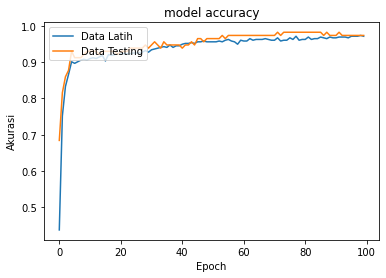

In [15]:
plt.plot(history_validasi.history['accuracy'])
plt.plot(history_validasi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Plot Loss
Evaluasi loss/error model yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

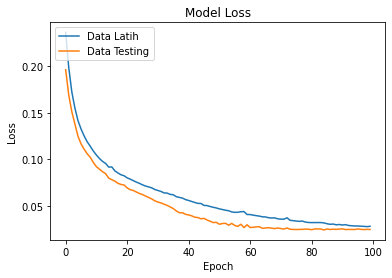

In [16]:
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Confussion Matrix

Selanjutnya untuk mengevaluasi hasil prediksi, akan dibuat confussion matriks. Fungsinya untuk melihat hasil prediksi, yang akan digolongkan menjadi beberapa kategori. Karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu True Positive, False Positive, False Negative, True Negative. 

In [17]:
prediction = model.predict_classes(data_testing)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)
cm = confusion_matrix(target_testing, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)
print ("Jumlah True Positive: ", tp)
print ("Jumlah True Negative: ", tn)
print ("Jumlah False Positive: ", fp)
print ("Jumlah False Negative: ", fn)

Confussion matriks:
 [[83  1]
 [ 2 28]]
Jumlah True Positive:  83
Jumlah True Negative:  28
Jumlah False Positive:  1
Jumlah False Negative:  2


## mencari nilai evaluasi 

In [19]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9880952380952381
recall :  0.9764705882352941
F1 :  0.9822485207100591
spec :  0.9655172413793104
sensitivity :  0.9764705882352941
akurasi :  0.9736842105263158


## Visualisasi ROC
ROC digunakan untuk melihat perbadingan antara Sensitivitas dan Spesifisitas. 

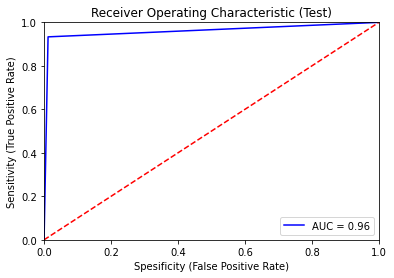

In [20]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(target_testing, prediction)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (Test)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('Spesificity (False Positive Rate)')
plt.show()